In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [4]:
df_penta_test = pd.read_excel(r'C:\Users\Kun\Downloads\test_new.xlsx')
df_penta_test.head(10)

,Spd_Engine,Trq_Engine,Flw_FuelDiesel
0,0.000000e+00,-6.959090,0.010659
1,0.000000e+00,0.017977,0.191122
2,0.000000e+00,0.025168,0.017878
3,0.000000e+00,0.027847,0.187903
4,0.000000e+00,0.050338,-0.007072
5,1.401300e-45,-7.029590,0.015278
6,1.401300e-45,-7.029590,0.024722
7,1.401300e-45,-6.849810,0.024722
8,1.401300e-45,-7.029590,0.024722
9,1.401300e-45,-7.029590,0.024722


In [6]:
df_penta_test = df_penta_test.loc[(df_penta_test.Trq_Engine > 0) & (df_penta_test.Flw_FuelDiesel > 0)]

In [7]:
df_penta_test

,Spd_Engine,Trq_Engine,Flw_FuelDiesel
1,0.000000e+00,0.017977,0.191122
2,0.000000e+00,0.025168,0.017878
3,0.000000e+00,0.027847,0.187903
4989,2.583090e+02,108.033000,0.184444
4990,2.808650e+02,95.447800,0.184444
...,...,...,...
47010,1.401300e-45,0.341590,0.006944
47011,1.401300e-45,0.161804,0.006944
47039,1.401300e-45,0.341590,0.002222
47042,1.401300e-45,0.161804,0.010000


In [ ]:
df_penta_test.describe()

,Spd_Engine,Trq_Engine,Flw_FuelDiesel
count,29782.000000,29782.000000,29782.000000
mean,1239.783546,702.573871,7.016565
std,676.629068,605.323831,5.821731
min,0.000000,0.017977,0.000278
25%,870.692750,130.955000,1.417500
50%,1564.145000,610.891000,6.245280
75%,1696.230000,1145.750000,11.664400
max,1965.340000,2592.840000,23.055000


[Text(0.5, 0, 'Engine Torque'),
 Text(0, 0.5, 'Flw_FuelDiesel'),
 Text(0.5, 1.0, 'Engine Torque VS Flw_FuelDiesel')]

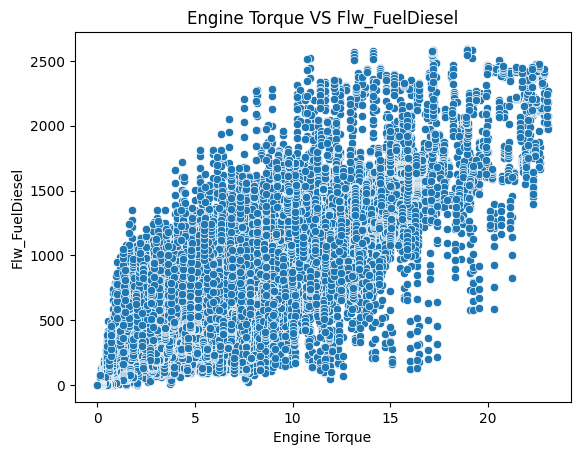

In [ ]:
sns.scatterplot(data=df_penta_test, x=df_penta_test.Flw_FuelDiesel, y=df_penta_test.Trq_Engine).set(xlabel="Engine Torque", ylabel = "Flw_FuelDiesel", title= "Engine Torque VS Flw_FuelDiesel")

[Text(0.5, 0, 'Engine Speed'),
 Text(0, 0.5, 'Flw_FuelDiesel'),
 Text(0.5, 1.0, 'Engine Speed VS Flw_FuelDiesel')]

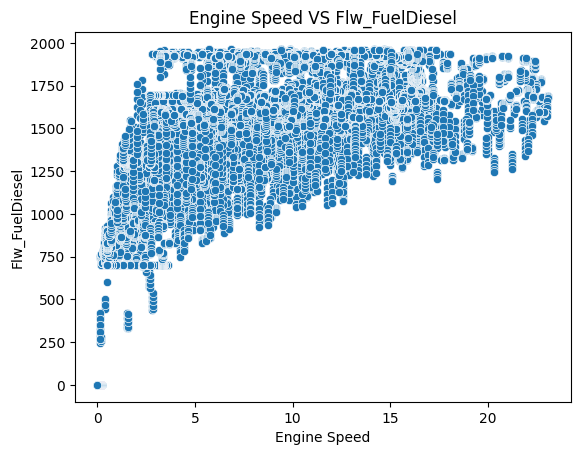

In [ ]:
sns.scatterplot(data=df_penta_test, x=df_penta_test.Flw_FuelDiesel, y=df_penta_test.Spd_Engine).set(xlabel="Engine Speed", ylabel = "Flw_FuelDiesel", title= "Engine Speed VS Flw_FuelDiesel")

In [ ]:
X, y = df_penta_test[["Spd_Engine", "Trq_Engine"]], df_penta_test[["Flw_FuelDiesel"]]
X.shape, y.shape

((29782, 2), (29782, 1))

### Features and Target scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

scaled_X = scaler.transform(X)

print(f"{scaled_X.min():.2f} ≤ scaled_X ≤ {scaled_X.max():.2f}")

0.00 ≤ scaled_X ≤ 1.00


In [ ]:
scaler = MinMaxScaler()
scaler.fit(y)

scaled_y = scaler.transform(y)

print(f"{scaled_y.min():.2f} ≤ scaled_y ≤ {scaled_y.max():.2f}")

0.00 ≤ scaled_y ≤ 1.00


## Load the models from penta_train

In [ ]:
with open('saved_models/SVD.pickle','rb') as f:
    model_SVD = pickle.load(f)
print(model_SVD)

LinearRegression()


In [ ]:
with open('saved_models/poly.pickle','rb') as f:
    model_poly = pickle.load(f)
print(model_poly)

LinearRegression()


In [ ]:
with open('saved_models/knn.pickle','rb') as f:
    model_knn = pickle.load(f)
print(model_knn)

KNeighborsRegressor(n_neighbors=4)


In [ ]:
with open('saved_models/tree_regression.pickle','rb') as f:
    model_trees = pickle.load(f)
print(model_trees)

DecisionTreeRegressor(max_depth=7)


In [ ]:
with open('saved_models/gbr.pickle','rb') as f:
    model_gbr = pickle.load(f)
print(model_gbr)

GradientBoostingRegressor(max_depth=7)


In [ ]:
with open('saved_models/xgbr.pickle','rb') as f:
    model_xgbr = pickle.load(f)
print(model_xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [ ]:
with open('saved_models/rfr.pickle','rb') as f:
    model_rfr = pickle.load(f)
print(model_rfr)

RandomForestRegressor()


## Predictions

In [ ]:
score_SVD = model_SVD.score(scaled_X,scaled_y)

pred_SVD = model_SVD.predict(scaled_X)
mae_SVD = mean_absolute_error(scaled_y, pred_SVD)

print(f"Linear, score: {score_SVD:.7f}, MAE: {mae_SVD:.7f}")

Linear, score: 0.7308380, MAE: 0.1019094


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_model_3 = PolynomialFeatures(3, include_bias=False)
X_features = poly_model_3.fit_transform(scaled_X)

score_poly = model_poly.score(X_features,scaled_y)

pred_poly = model_poly.predict(X_features)
mae_poly = mean_absolute_error(scaled_y, pred_poly)

print(f"Poly, score: {score_poly:.7f}, MAE: {mae_poly:.7f}")

Poly, score: 0.7950834, MAE: 0.0741651


In [ ]:
score_knn = model_knn.score(scaled_X,scaled_y)

pred_knn = model_knn.predict(scaled_X)
mae_knn = mean_absolute_error(scaled_y, pred_knn)

print(f"KNN, score: {score_knn:.7f}, MAE: {mae_knn:.7f}")

KNN, score: 0.7936044, MAE: 0.0736278


In [ ]:
score_trees = model_trees.score(scaled_X,scaled_y)

pred_trees = model_trees.predict(scaled_X)
mae_trees = mean_absolute_error(scaled_y, pred_trees)

print(f"Trees, score: {score_trees:.7f}, MAE: {mae_trees:.7f}")

Trees, score: 0.7783595, MAE: 0.0783282


In [ ]:
score_gbr = model_gbr.score(scaled_X,scaled_y)

pred_gbr = model_gbr.predict(scaled_X)
mae_gbr = mean_absolute_error(scaled_y, pred_gbr)

print(f"GBR, score: {score_gbr:.7f}, MAE: {mae_gbr:.7f}")

GBR, score: 0.7552183, MAE: 0.0843438


In [ ]:
score_xgbr = model_xgbr.score(scaled_X,scaled_y)

pred_xgbr = model_xgbr.predict(scaled_X)
mae_xgbr = mean_absolute_error(scaled_y, pred_xgbr)

print(f"XGBR, score: {score_xgbr:.7f}, MAE: {mae_xgbr:.7f}")

XGBR, score: 0.7506521, MAE: 0.0866326


In [ ]:
score_rfr = model_rfr.score(scaled_X,scaled_y)

pred_rfr = model_rfr.predict(scaled_X)
mae_rfr = mean_absolute_error(scaled_y, pred_rfr)

print(f"Random trees, score: {score_rfr:.7f}, MAE: {mae_rfr:.7f}")

Random trees, score: 0.7848682, MAE: 0.0760992


## Summary

|      Models      |      Scores & MAE   |
|-----------------|--------------------------------|
|     Linear Regression     |       score: 0.7308380, MAE: 0.1019094      |
|           Polynormial Regression        |    score: 0.7950834, MAE: 0.0741651 ## |
|             KNN    |        score: 0.7936044, MAE: 0.0736278    ## | 
|             Decision Trees |       score: 0.7783595, MAE: 0.0783282   | 
|             Gradient Boosting Decision Tree   |        score: 0.7552183, MAE: 0.0843438  | 
|             XGboost   |         score: 0.7506521, MAE: 0.0866326  | 
|             Random Forest  |        score: 0.7848682, MAE: 0.0760992   | 